In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:

data=pd.read_csv("financials.csv")
data = data.dropna()
data.isnull().sum()

# Étape 1 : Nettoyage des données
# Suppression des colonnes inutiles (par exemple, Project Links)
data = data.drop(['SEC Filings'], axis=1)


In [3]:

X = data[["Price/Earnings", "Dividend Yield", "Earnings/Share", "52 Week Low", "52 Week High","Market Cap","EBITDA","Price/Sales","Price/Book"]]
X

def classify_performance(row):
    if row['Price/Earnings'] < 20:
        return 'bonne'
    elif 20 <= row['Price/Earnings'] <= 50:
        return 'moyenne'
    else:
        return 'faible'

data['performance'] = data.apply(classify_performance, axis=1)
y=data['performance']


In [4]:
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Diviser les données en ensembles d'entraînement et de test avec les données normalisées
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [7]:

classifier = SVC(kernel='linear',random_state=42)

In [8]:


classifier.fit(X_train, Y_train)


SVC(kernel='linear', random_state=42)

In [9]:
# Étape 6 : Prédictions et évaluation
Y_pred = classifier.predict(X_test)
Y_pred

array(['bonne', 'bonne', 'bonne', 'bonne', 'bonne', 'bonne', 'bonne',
       'bonne', 'bonne', 'faible', 'moyenne', 'moyenne', 'moyenne',
       'bonne', 'moyenne', 'bonne', 'moyenne', 'faible', 'moyenne',
       'moyenne', 'bonne', 'bonne', 'bonne', 'bonne', 'faible', 'bonne',
       'bonne', 'bonne', 'moyenne', 'moyenne', 'moyenne', 'bonne',
       'moyenne', 'moyenne', 'moyenne', 'bonne', 'bonne', 'bonne',
       'moyenne', 'moyenne', 'moyenne', 'bonne', 'bonne', 'moyenne',
       'moyenne', 'bonne', 'bonne', 'moyenne', 'faible', 'moyenne',
       'bonne', 'bonne', 'bonne', 'bonne', 'moyenne', 'bonne', 'bonne',
       'moyenne', 'bonne', 'moyenne', 'bonne', 'bonne', 'bonne', 'bonne',
       'faible', 'moyenne', 'bonne', 'bonne', 'bonne', 'bonne', 'bonne',
       'bonne', 'bonne', 'moyenne', 'moyenne', 'bonne', 'moyenne',
       'moyenne', 'moyenne', 'bonne', 'bonne', 'moyenne', 'bonne',
       'faible', 'bonne', 'faible', 'faible', 'moyenne', 'bonne', 'bonne',
       'bonne', 'bonne

In [10]:
# Calcul de l'accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


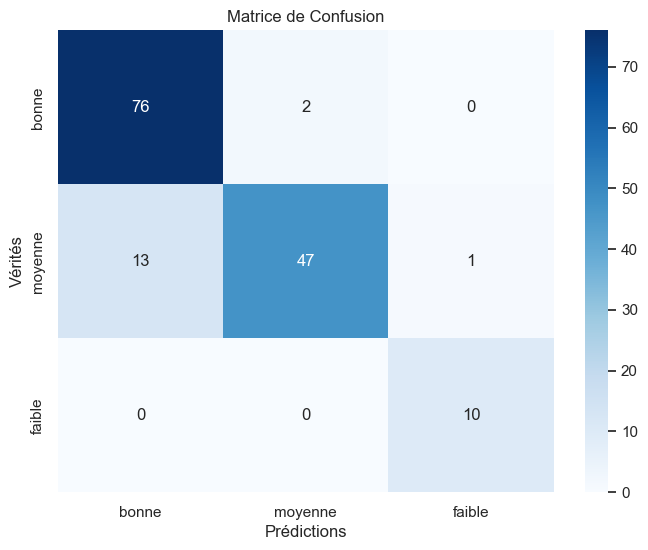

In [11]:
# Matrice de confusion

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred, labels=['bonne', 'moyenne', 'faible'])

# Création de la heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['bonne', 'moyenne', 'faible'], yticklabels=['bonne', 'moyenne', 'faible'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()